In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/DeepLearning/DLSS

/content/drive/MyDrive/DeepLearning/DLSS


In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.models import load_model

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import glob
import os
from google.colab.patches import cv2_imshow

# Parameters

If resize need:

In [ ]:
for imgs in glob.glob("/content/drive/MyDrive/"):
  img = cv2.imread(imgs)
  resize = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA)
  cv2.imwrite((''), resize)
  

In [ ]:
# Dimensions of the images inside the dataset.
input_dimensions = (128,128,3)

# Dimensions of the images inside the dataset.
output_dimensions = (256,256,3)

# The ratio of the difference in size of the two images. Used for setting ratio of image subplots
super_sampling_ratio = int(output_dimensions[0] / input_dimensions[0])

# Path to saved .h5 model
model_path = ('/content/drive/MyDrive/FOLDER/generator.h5')

# Path to folder containing images to super sample
dataset_path = ('/content/drive/MyDrive/FOLDER/SAMPLES/')

# Folder where you want to save to model as well as generated samples
save_path = ('/content/drive/MyDrive/FOLDER/GENERATEDSAMPLES/')

# Boolean flag, set to True if the data has pngs to remove alpha layer from images
png = True

# Load Model

In [ ]:
model = load_model(model_path, compile=False)

# Load Images and Super Sample

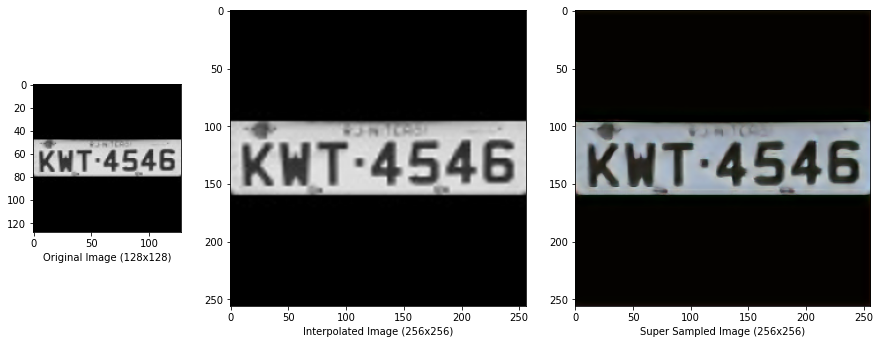

In [ ]:
paths = []
count = 0

for r, d, f in os.walk(dataset_path):
    for file in f:
        if '.png' in file or 'jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    
    # Select image
    img = Image.open(path)

    #create plot
    f, axarr = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1,super_sampling_ratio,super_sampling_ratio]})
    axarr[0].set_xlabel('Original Image (' + str(input_dimensions[0]) + 'x' + str(input_dimensions[1]) + ')', fontsize=10)
    axarr[1].set_xlabel('Interpolated Image (' + str(output_dimensions[0]) + 'x' + str(output_dimensions[1]) + ')', fontsize=10)
    axarr[2].set_xlabel('Super Sampled Image (' + str(output_dimensions[0]) + 'x' + str(output_dimensions[1]) + ')', fontsize=10)

    #original image
    x = img.resize((input_dimensions[0],input_dimensions[1]))
    
    #interpolated (resized) image
    y = x.resize((output_dimensions[0],output_dimensions[1]))
    
    
    x = np.array(x)
    y = np.array(y)
    
    # Remove alpha layer if imgaes are PNG
    if(png):
        x = x[...,:3]
        y = y[...,:3]
    
    #plotting first two images
    axarr[0].imshow(x)
    axarr[1].imshow(y)
    
    #plotting super sampled image
    x = x.reshape(1,input_dimensions[0],input_dimensions[1],input_dimensions[2])/255
    result = np.array(model.predict_on_batch(x))*255
    result = result.reshape(output_dimensions[0],output_dimensions[1],output_dimensions[2])
    np.clip(result, 0, 255, out=result)
    result = result.astype('uint8')
                
    axarr[2].imshow(result)
    
    # Save image
    f.savefig(save_path + '\\frame_%d.png' % count)
    
    # Increment file name counter
    count = count + 1